# Scaling
Use the D.C. Residential Properties dataset from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data.

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = "DC_Properties.csv"

prop_df = pd.read_csv(filepath)
prop_df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [5]:
prop_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [48]:
price = prop_df['PRICE']
price_df = pd.DataFrame(price)
type(price_df)

pandas.core.frame.DataFrame

In [49]:
price_df

,PRICE
0,1095000.0
1,NaN
2,2100000.0
3,1602000.0
4,NaN
...,...
158952,399900.0
158953,416000.0
158954,600000.0
158955,215100.0


In [50]:
len(price_df)

158957

In [51]:
price_df = price_df.dropna()
price_df.head()

,PRICE
0,1095000.0
2,2100000.0
3,1602000.0
5,1950000.0
7,1050000.0


In [52]:
len(price_df)

98216

In [67]:
price_df.describe()

,PRICE
count,9.821600e+04
mean,9.313516e+05
std,7.061325e+06
min,1.000000e+00
25%,2.400000e+05
50%,3.999990e+05
75%,6.520000e+05
max,1.374275e+08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ea7dfd0>]],
      dtype=object)

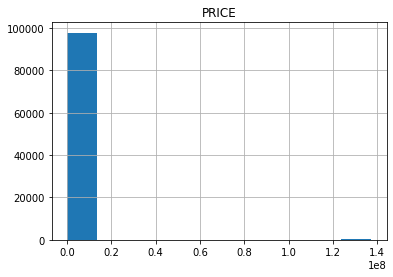

In [66]:
price_df.hist()

## Zscore Standardization

In [55]:
# z = (value-mean)/stdev
scaler = StandardScaler()
price_zscore = scaler.fit_transform(price_df[['PRICE']])

In [56]:
price_zscore[:5]

array([[0.02317543],
       [0.16550072],
       [0.09497535],
       [0.14425814],
       [0.01680266]])

In [58]:
type(price_zscore)

numpy.ndarray

In [69]:
price_df.mean(), price_df.std()

(PRICE    931351.594934
 dtype: float64,
 PRICE    7.061325e+06
 dtype: float64)

In [57]:
price_zscore.mean(), price_zscore.std()

(-4.630074029551846e-18, 1.0)

In [59]:
price_z_col = pd.Series(price_zscore.reshape(-1))

In [61]:
print(price_z_col[:5])
print(type(price_z_col))

0    0.023175
1    0.165501
2    0.094975
3    0.144258
4    0.016803
dtype: float64
<class 'pandas.core.series.Series'>


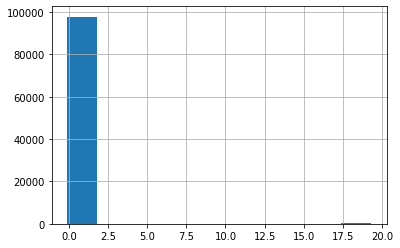

In [64]:
price_z_col.hist()

## Min-Max Scaling

In [70]:
# m = (value-min)/(max-min)
minmax_sc = MinMaxScaler()
price_minmax = minmax_sc.fit_transform(price_df[["PRICE"]])

In [72]:
print(price_minmax.min(), price_minmax.max())

0.0 0.9999999999999999


In [73]:
print(price_df.min(), price_df.max())

PRICE    1.0
dtype: float64 PRICE    137427545.0
dtype: float64


In [83]:
print(price_minmax[:5])
type(price_minmax)

[[0.00796783]
 [0.01528077]
 [0.01165704]
 [0.01418929]
 [0.00764038]]


numpy.ndarray

In [80]:
price_mm_col = pd.Series(price_minmax.reshape(-1))
price_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

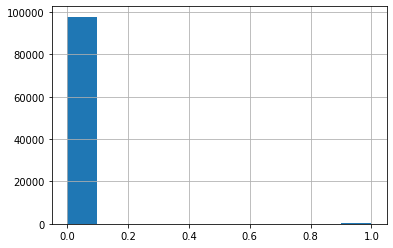

In [85]:
price_mm_col.hist()